# 5 .Simulating the process with a toy dataset of weather conditions to determine whether or not a person will play tennis using candidate elimination algorithm.

In [7]:
import numpy as np

data = np.array([
    ['Sunny', 'High', 'Weak', 'No'],
    ['Overcast', 'High', 'Weak', 'Yes'],
    ['Rain', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Normal', 'Strong', 'No']
])


X = data[:, :-1]  
y = data[:, -1]   

def initialize_hypotheses(features):
    num_features = features.shape[1]
    G = [['?' for _ in range(num_features)]]  
    S = [['∅' for _ in range(num_features)]]  
    return G, S

def is_consistent(hypothesis, example, label):
    for i in range(len(hypothesis)):
        if hypothesis[i] != '?' and hypothesis[i] != example[i]:
            return False
    return True

def candidate_elimination(X, y):
    G, S = initialize_hypotheses(X)
    for i in range(len(X)):
        example = X[i]
        label = y[i]
        if label == 'Yes':  
            G = [h for h in G if is_consistent(h, example, label)]
           
            for j in range(len(S[0])):
                if S[0][j] != example[j]:
                    S[0][j] = '?'
        else:  
            new_G = []
            for h in G:
                if not is_consistent(h, example, label):
                    new_G.append(h)
                else:
                    for j in range(len(h)):
                        if h[j] == '?':
                            new_h = h.copy()
                            new_h[j] = example[j]
                            if is_consistent(new_h, example, label):
                                new_G.append(new_h)
            G = new_G
        print(f"Step {i+1}:")
        print(f"G: {G}")
        print(f"S: {S}")
        print()
    return G, S

G, S = candidate_elimination(X, y)

print("Final General Hypothesis (G):", G)
print("Final Specific Hypothesis (S):", S)

Step 1:
G: [['Sunny', '?', '?'], ['?', 'High', '?'], ['?', '?', 'Weak']]
S: [['∅', '∅', '∅']]

Step 2:
G: [['?', 'High', '?'], ['?', '?', 'Weak']]
S: [['?', '?', '?']]

Step 3:
G: [['?', '?', 'Weak']]
S: [['?', '?', '?']]

Step 4:
G: [['?', '?', 'Weak']]
S: [['?', '?', '?']]

Final General Hypothesis (G): [['?', '?', 'Weak']]
Final Specific Hypothesis (S): [['?', '?', '?']]


# 7. Using the Iris dataset and compare supervised classification of species with unsupervised clustering 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

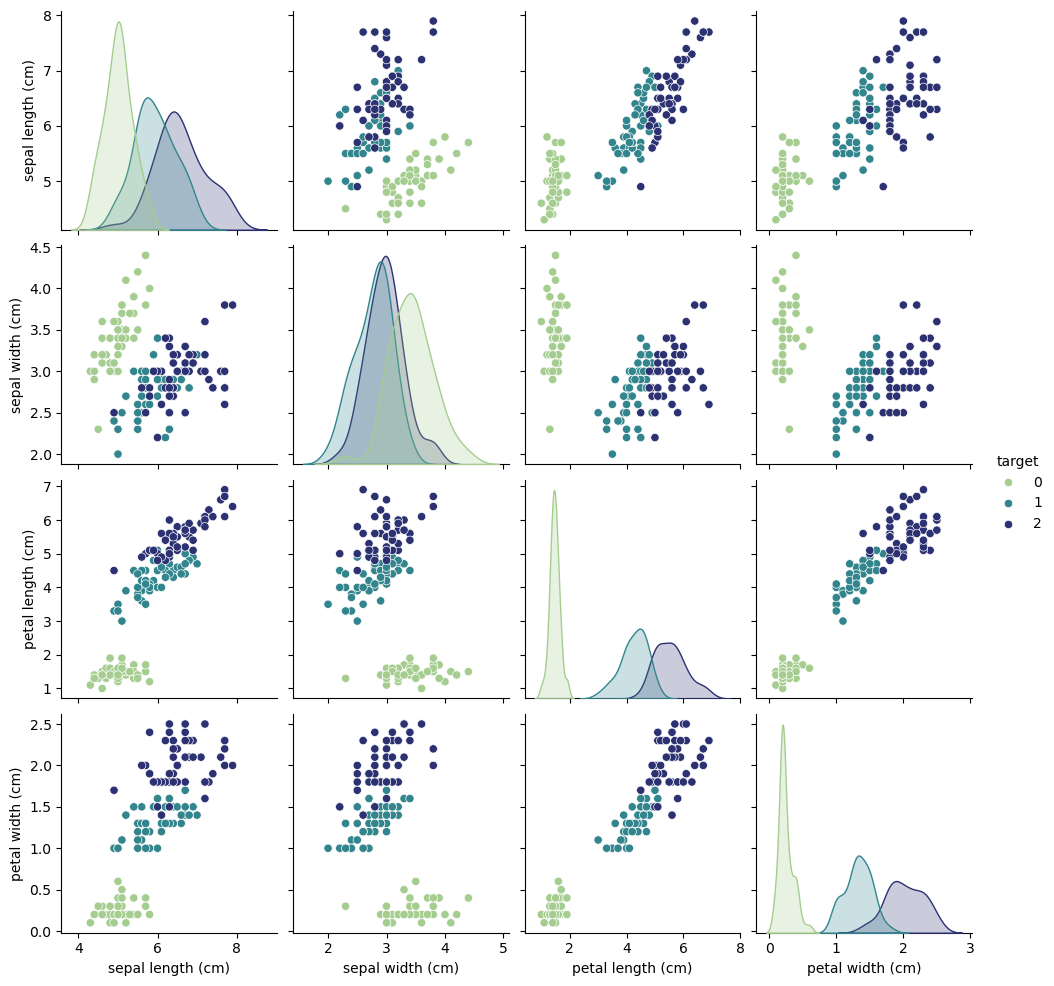

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


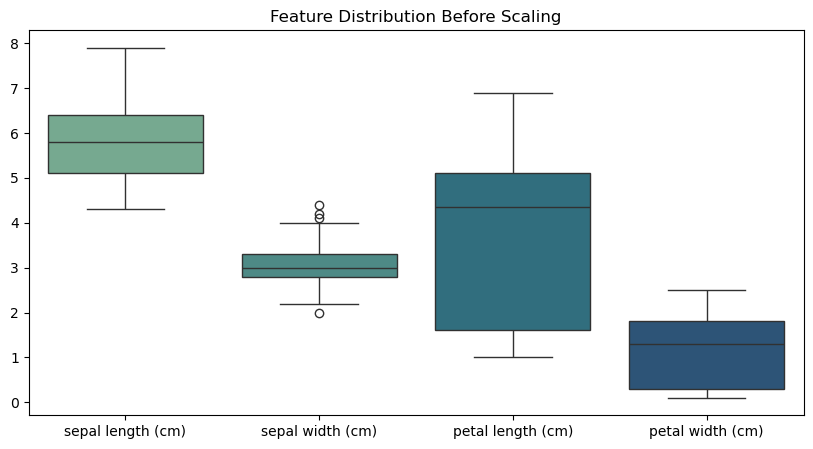

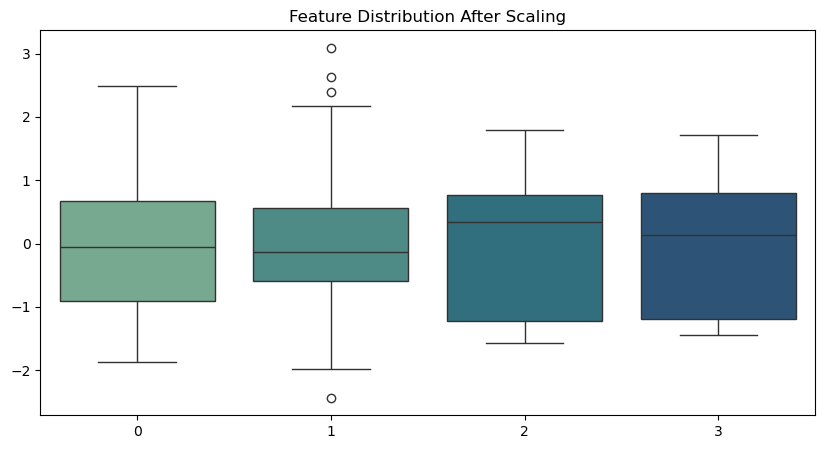

Logistic Regression Accuracy: 0.6333333333333333
SVM Accuracy: 0.3
KNN Accuracy: 1.0
Confusion Matrix for K-Means:
[[33 17  0]
 [ 0  7 43]
 [ 0  0 50]]


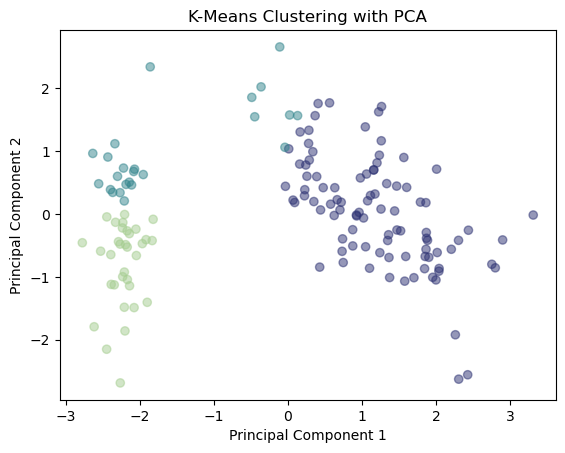

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.spatial.distance import cdist

iris_data = load_iris()
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df_iris['target'] = iris_data.target

print(df_iris.head())
print(df_iris.describe())
sns.pairplot(df_iris, hue='target', palette ="crest")
plt.show()

print(df_iris.isnull().sum())

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_iris.iloc[:, :-1], palette = "crest")
plt.title("Feature Distribution Before Scaling")
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_iris.iloc[:, :-1])
y_target = df_iris['target']

plt.figure(figsize=(10, 5))
sns.boxplot(data=X_scaled,palette = "crest")
plt.title("Feature Distribution After Scaling")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    
    for _ in range(epochs):
        linear_model = np.dot(X, w) + b
        y_pred = sigmoid(linear_model)
        
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)
        
        w -= lr * dw
        b -= lr * db
    
    return w, b

w_lr, b_lr = logistic_regression(X_train, y_train)
y_pred_lr = np.round(sigmoid(np.dot(X_test, w_lr) + b_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

def svm_train(X, y, lr=0.01, epochs=1000, C=1.0):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    y = np.array(y)
    
    for _ in range(epochs):
        for i, x in enumerate(X):
            condition = y[i] * (np.dot(x, w) - b) >= 1
            if condition:
                w -= lr * (2 * C * w)
            else:
                w -= lr * (2 * C * w - np.dot(x, y[i]))
                b -= lr * y[i]
    
    return w, b

w_svm, b_svm = svm_train(X_train, y_train)
y_pred_svm = np.sign(np.dot(X_test, w_svm) - b_svm)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    y_train = np.array(y_train)
    for test_point in X_test:
        distances = np.linalg.norm(X_train - test_point, axis=1)
        k_indices = np.argsort(distances)[:k]
        k_labels = y_train[k_indices]
        y_pred.append(np.bincount(k_labels).argmax())
    return np.array(y_pred)

y_pred_knn = knn_predict(X_train, y_train, X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

def kmeans(X, k, max_iters=100):
    m, n = X.shape
    centroids = X[np.random.choice(m, k, replace=False)]
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for i, x in enumerate(X):
            distances = [np.linalg.norm(x - centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(x)
        centroids = [np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)]
    labels = [np.argmin([np.linalg.norm(x - centroid) for centroid in centroids]) for x in X]
    return np.array(labels)

kmeans_labels = kmeans(X_scaled, 3)
print("Confusion Matrix for K-Means:")
print(confusion_matrix(y_target, kmeans_labels))

def pca(X, n_components=2):
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    covariance_matrix = np.cov(X_centered.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    return np.dot(X_centered, eigenvectors[:, :n_components])

X_pca = pca(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='crest', alpha=0.5)
plt.title("K-Means Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# 10. Use Logistic Regression on a synthetic dataset and compute risks for different training sample size. 

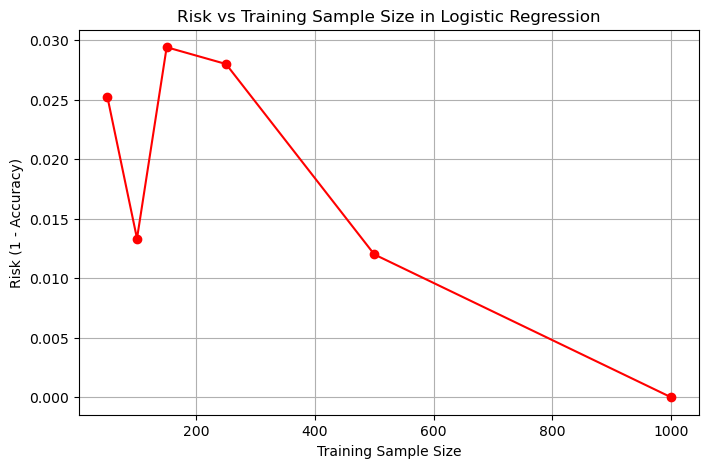

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def generate_data(n_samples=1000, n_features=2):
    np.random.seed(42)
    X_data = np.random.randn(n_samples, n_features)
    y_data = (X_data[:, 0] + X_data[:, 1] > 0).astype(int)
    return X_data, y_data

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    
    for _ in range(epochs):
        linear_model = np.dot(X, w) + b
        y_pred = sigmoid(linear_model)
        
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)
        
        w -= lr * dw
        b -= lr * db
    
    return w, b

sample_sizes = [50, 100, 150, 250, 500, 1000]
risk_values = []
X_data, y_data = generate_data()

for size in sample_sizes:
    train_size = min(size, len(X_data) - 1)
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=train_size, random_state=42)
    w, b = logistic_regression(X_train, y_train)
    y_pred = np.round(sigmoid(np.dot(X_test, w) + b))
    risk = 1 - accuracy_score(y_test, y_pred)
    risk_values.append(risk)

plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, risk_values, marker='o', linestyle='-', color='red')
plt.xlabel("Training Sample Size")
plt.ylabel("Risk (1 - Accuracy)")
plt.title("Risk vs Training Sample Size in Logistic Regression")
plt.grid()
plt.show()